In [14]:
import json
import glob, os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# os.chdir("results")

In [15]:
plt.style.use('~/.mplstyle')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = 12,8

In [16]:
df = pd.DataFrame(columns=["Experiment", "Digit", "Accuracy"])
for file in glob.glob("*.json"):
    print(file)
    with open(file, "r") as f:
        d = json.load(f)
        for k in ['3','4','5','6']:
            df.loc[len(df)] = [file.split('.')[0], k, d[k]['accuracy']]
df
            

main_order.json
main_correct_order.json
no_perfect_calculator.json
no_left_to_right.json
no_instruction.json
main.json
no_write_carry_string.json
no_starting_from_rightmost_column.json
no_carry_on_indicator.json
main_reverse_order.json
no_brackets.json
without_comas_in_the_input.json


,Experiment,Digit,Accuracy
0,main_order,3,0.00
1,main_order,4,0.00
2,main_order,5,0.00
3,main_order,6,0.00
4,main_correct_order,3,0.61
5,main_correct_order,4,0.56
6,main_correct_order,5,0.32
7,main_correct_order,6,0.14
8,no_perfect_calculator,3,0.80
9,no_perfect_calculator,4,0.78


In [17]:
df.sort_values('Accuracy', ascending=False)
df = df.loc[df['Experiment'] != 'main_order',:]

In [18]:
df = df.sort_values('Accuracy', ascending=False)

In [ ]:
df.replace('no_brackets', 'no_brackets_order', inplace=True)

In [19]:
import numpy as np
def show_labels(df):
    # label points on the plot
    for x, y in zip(df['Experiment'], df['Accuracy']):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x, # x-coordinate position of data label
        y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
        s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
        color = 'purple') # set colour of line

In [94]:
from matplotlib.ticker import MultipleLocator

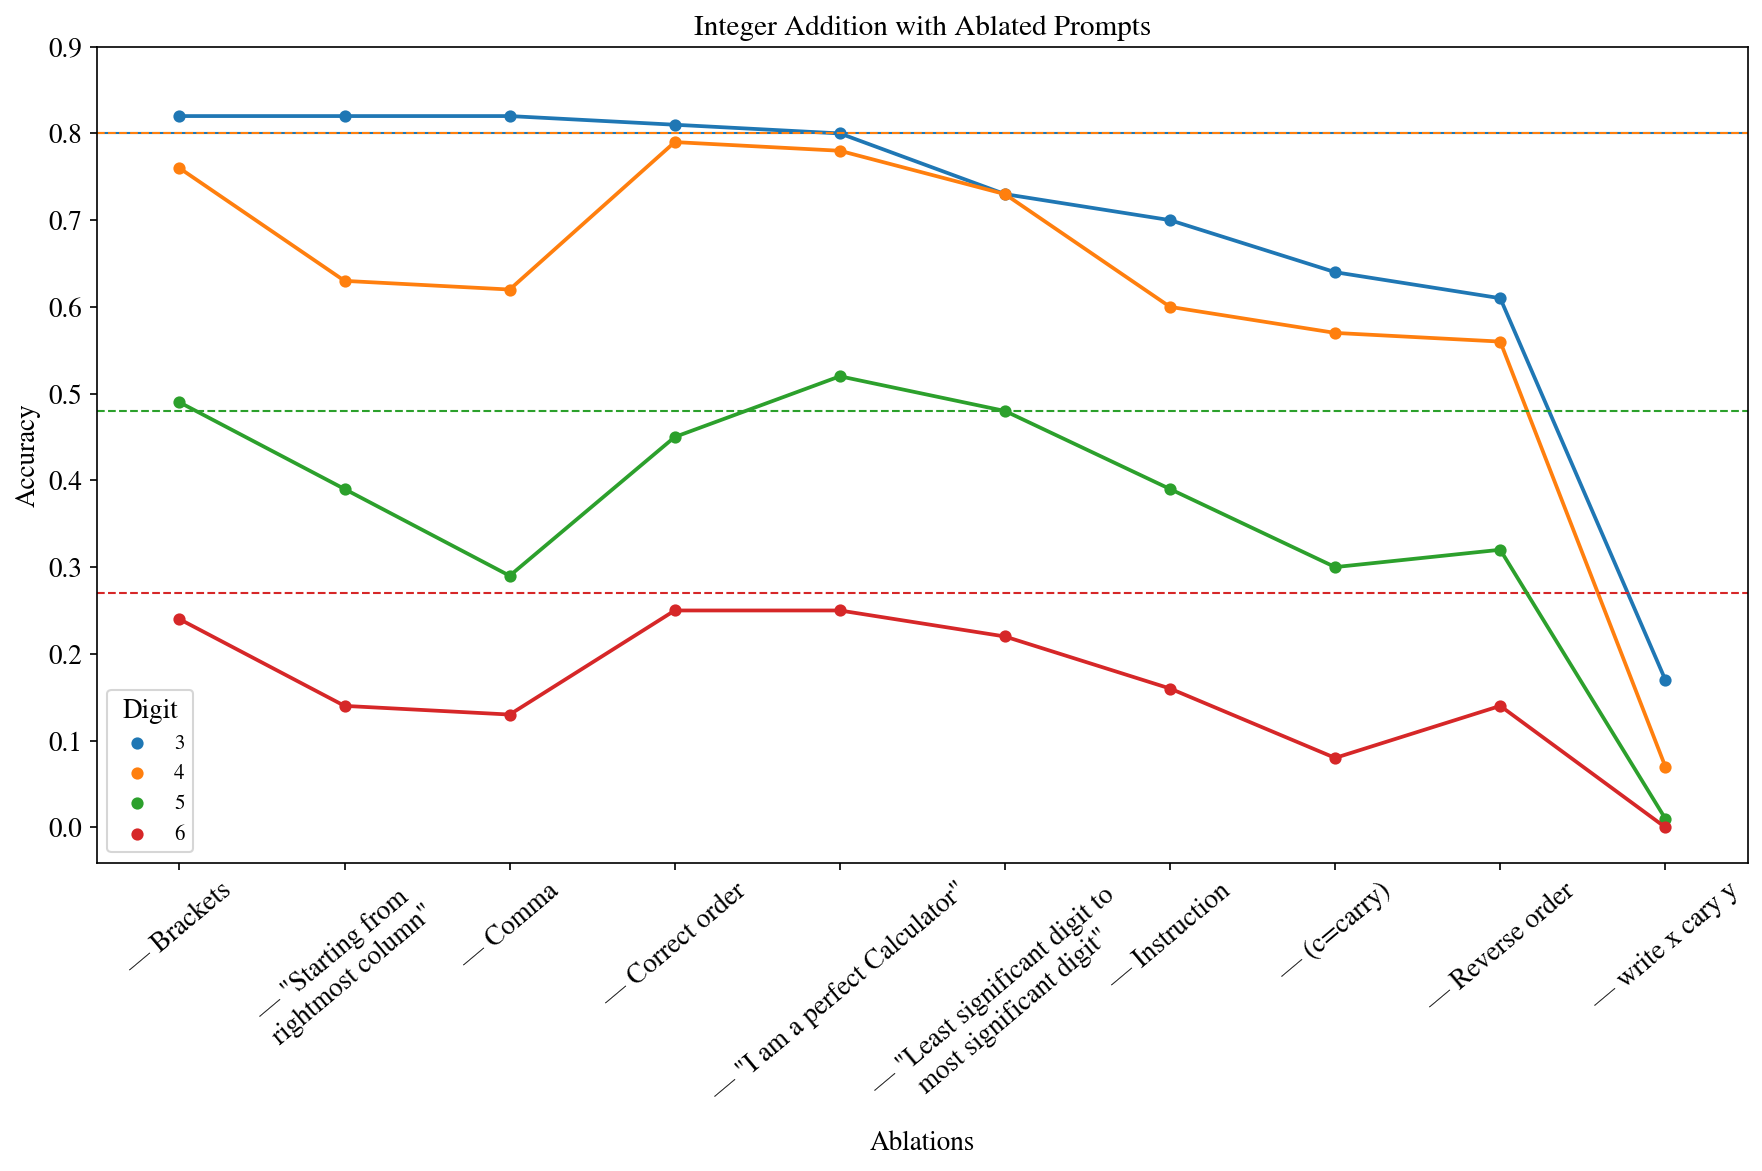

In [130]:
pdf = df.replace('no_brackets', '— Brackets')
pdf = pdf.replace('no_starting_from_rightmost_column', '— "Starting from \nrightmost column"')
pdf = pdf.replace('without_comas_in_the_input', "— Comma")
pdf = pdf.replace('main_reverse_order', "— Correct order")
pdf = pdf.replace('main_correct_order', "— Reverse order")
pdf = pdf.replace('no_instruction', "— Instruction")
pdf = pdf.replace('no_carry_on_indicator', "— (c=carry)")
pdf = pdf.replace('no_write_carry_string', "— write x cary y")
pdf = pdf.replace('no_perfect_calculator', '— "I am a perfect Calculator"')
pdf = pdf.replace('no_left_to_right', '— "Least significant digit to \nmost significant digit"')
ax = sns.pointplot(data=pdf[pdf['Experiment'] != 'main'], x="Experiment", y="Accuracy", hue='Digit', marker='.', scale = 0.5)
plt.title("Integer Addition with Ablated Prompts")
plt.xlabel("Ablations")
plt.xticks(rotation=40)
pdf = pdf.set_index(['Experiment', 'Digit'])
ax.axhline(pdf.loc['main', '3'][0], color=sns.color_palette()[0], linestyle='-', linewidth=1)
ax.axhline(pdf.loc['main', '4'][0], color=sns.color_palette()[1], linestyle='--', linewidth=1)
ax.axhline(pdf.loc['main', '5'][0], color=sns.color_palette()[2], linestyle='--', linewidth=1)
ax.axhline(pdf.loc['main', '6'][0], color=sns.color_palette()[3], linestyle='--', linewidth=1)
ax.set_yticks(np.linspace(0,0.9,10))

In [128]:
ax

<AxesSubplot:title={'center':'Integer Addition with Ablated Prompts'}, xlabel='Ablations', ylabel='Accuracy'>